# Many Variables  GHZ

with twophotonresonance= off

In [1]:
print('Started!')
from system import *
s1 = system('o-o-x-o-',MMA=True,ManyVariables = True,TwoPhotonResonance=False)
#s1 = load_object('GHZ')

Started!
Initializing system o-o-x-o-  ...
Constructing states and excitations...
Constructing ground and first-excited statespace...
Constructing gs_hamiltonian ...
Constructing e1_hamiltonian ...
Constructing interactions V_plus and V_minus ...
Constructing NJ_hamiltonian  ...
Inverting NJ_hamiltonian  ...
Constructing eff_hamiltonian and effective lindblau operators ...

System  o-o-x-o-  initialized in 736.4 seconds.


# Effective Hamiltonian Matrix obtain 

In [2]:
n = 0  #exponent



total_indices = s1.variable_index

var('dct',domain='positive',  latex_name =r'{\delta }_c') #modified version without the tilde

var('De1', domain='positive')
var('Deg1', domain='positive' , latex_name =r'{{\Delta e}}_{{  1}}^\gamma')
var('De2', domain='positive')
var('Deg2', domain='positive' , latex_name =r'{{\Delta e}}_{{  2}}^\gamma')
var('De3', domain='positive')
var('Deg3', domain='positive' , latex_name =r'{{\Delta e}}_{{  3}}^\gamma')    

var('gamma','DE','De','g','g_f','Omega','v','gamma_f','gamma_g','phi',domain='positive')
var('DEg', domain='positive' , latex_name =r'{{\Delta E}}^\gamma')
var('kappa_c','kappa_b',domain='positive')
var('C',domain='positive')
var('c',domain='positive',  latex_name =r'c')
var('r_f',domain='positive',latex_name =r'r_f')
var('r_g',domain='positive',latex_name =r'r_g')
var('R_f',domain='positive')#ratio  (g_f/g)^2
eff_hamiltonian_tayl = sg.copy( s1.eff_hamiltonian.parent().zero())
for diag in s1.pos_gs:
    print(f'Calculating {diag} out of {s1.pos_gs}...')
    min_expr_len = 10**10
    for term in range(1):
        b = s1.eff_hamiltonian[diag,diag]
        b = b.operands()[1].operands()[term]
        if len(str(b))<10: #we isolated Omega^2 instead of one of the conjugate pairs
            b = s1.eff_hamiltonian[diag,diag].operands()[0].operands()[term]
        
        
        b = b._mathematica_().ReplaceAll(f'DE->DEg*gamma*C^({n})')._sage_()
        #b = b.subs(DE = DEg*gamma*C^n)
        
        b = b._mathematica_().ReplaceAll(f'De1->Deg1*gamma*C^({n})')._sage_()
        #b = b.subs(De1 = Deg1*gamma*C^n) #sqrt C scaling!?
        
        b = b._mathematica_().ReplaceAll(f'De2->Deg2*gamma*C^({n})')._sage_()
        #b = b.subs(De2 = Deg2*gamma*C^n) #MAKE ZERO
        
        b = b._mathematica_().ReplaceAll(f'De3->Deg2*gamma*C^({n})')._sage_()
        #b = b.subs(De3 = Deg3*gamma*C^n) #MAKE ZERO  
        
        b = b.subs(dc = dct*kappa_c*C^n )
        
        #b = b.subs(phi = phi_val)
        
        #b = MMA_simplify(b)
        
        #b = b._mathematica_().ReplaceAll('g_f->g*(R_f)^(1/2)')._sage_()
        b = b.subs(g_f=g*(R_f)^(1/2))

        b = b._mathematica_().ReplaceAll('gamma_f->gamma*r_f')._sage_()
        #b = b.subs(gamma_f=gamma*r_f)

        b = b._mathematica_().ReplaceAll('gamma_g->gamma*r_g')._sage_()
        #b = b.subs(gamma_g=gamma*r_g)
        
        #b = b._mathematica_().ReplaceAll("g-> (C*gamma*kappa_c)^(1/2)")._sage_()
        b = b.subs(g = (C*gamma*kappa_c)^(1/2)) 
        
        b = b._mathematica_().ReplaceAll('v->(c*kappa_b*kappa_c)^(1/2)')._sage_()
        #b = b.subs(v = (c*kappa_b*kappa_c)^(1/2) )
        
        
        

        #Substitutions
        #b = b.subs(c=np.pi,R_f=2.1,Deg=np.e,DEg=np.sqrt(5),r_g=np.sqrt(3),r_f=np.sqrt(2), phi=phi_val) 
        #b = b.subs(phi=phi_val)

        #b = b._mathematica_().Factor()._sage_()
        #b = b._mathematica_().Together()._sage_()


        b = SR(str(b).replace('Sqrt','sqrt'))
        if len(str(b))<min_expr_len:
            min_expr_len = len(str(b))
            h_eff = b
    
    h_eff = h_eff.subs(c=C)
    h_eff = MMA_simplify(h_eff)
    '''
    h_eff = SR(str(h_eff).replace('Sqrt','sqrt'))
    var('x')
    h_eff = h_eff.subs(C=1/x)
    h_eff = MMA_simplify(h_eff)
    h_eff = h_eff._mathematica_().Series((x,0,1)).Normal()._sage_()
    h_eff = h_eff.subs(x=1/C)
    '''
    h_eff = SR(str(h_eff).replace('Sqrt','sqrt'))
    eff_hamiltonian_tayl[diag,diag] = h_eff  * Omega^2 / 2

print('\n Done! ')
#show(symround(eff_hamiltonian_tayl[s1.pos_gs,s1.pos_gs],digits=3))


eff_hamiltonian_tayl_temp = eff_hamiltonian_tayl[s1.pos_gs,s1.pos_gs] 





lind_op_number = len(s1.lindblau_list)

eff_lind_taylor = []
eff_lind = []
eff_lind_coeff = []
for lind_op in range(lind_op_number):
    print(f'{lind_op} out of {lind_op_number-1}')
    eff_lind_taylor.append([])
    eff_lind.append([])
    L_matrix = s1.eff_lindblau_list[lind_op]
    L_nonzeros = []
    L_nonzeros_pos = []
    for i in  range(L_matrix.nrows()):
        for j in  range(L_matrix.ncols()):
            if not str(symround(L_matrix[i,j]))==str(0):
                L_nonzeros.append(L_matrix[i,j])
                L_nonzeros_pos.append((i,j))
    eff_lind_coeff.append(s1.L_coeffs[lind_op])
    
    for which in range(len(L_nonzeros)):

        L_elem = L_nonzeros[which]
        b = L_elem
        
        
        b = b._mathematica_().ReplaceAll(f'DE->DEg*gamma*C^({n})')._sage_()
        #b = b.subs(DE = DEg*gamma*C^n)
        
        b = b._mathematica_().ReplaceAll(f'De1->Deg1*gamma*C^({n})')._sage_()
        #b = b.subs(De1 = Deg1*gamma*C^n) #sqrt C scaling!?
        
        b = b._mathematica_().ReplaceAll(f'De2->Deg2*gamma*C^({n})')._sage_()
        #b = b.subs(De2 = Deg2*gamma*C^n) #MAKE ZERO
        
        b = b._mathematica_().ReplaceAll(f'De3->Deg2*gamma*C^({n})')._sage_()
        #b = b.subs(De3 = Deg3*gamma*C^n) #MAKE ZERO  
        
        b = b.subs(dc = dct*kappa_c*C^n )
        
        #b = b.subs(phi = phi_val)
        
        #b = MMA_simplify(b)
        
        #b = b._mathematica_().ReplaceAll('g_f->g*(R_f)^(1/2)')._sage_()
        b = b.subs(g_f=g*(R_f)^(1/2))

        b = b._mathematica_().ReplaceAll('gamma_f->gamma*r_f')._sage_()
        #b = b.subs(gamma_f=gamma*r_f)

        b = b._mathematica_().ReplaceAll('gamma_g->gamma*r_g')._sage_()
        #b = b.subs(gamma_g=gamma*r_g)
        
        #b = b._mathematica_().ReplaceAll("g-> (C*gamma*kappa_c)^(1/2)")._sage_()
        b = b.subs(g = (C*gamma*kappa_c)^(1/2)) 
        
        b = b._mathematica_().ReplaceAll('v->(c*kappa_b*kappa_c)^(1/2)')._sage_()
        
        b = b.subs(c=C)
        
        b = SR(str(b).replace('Sqrt','sqrt'))
        
        eff_lind[lind_op].append(b)
        
print('\n Done!')


eff_hamiltonian_tayl = eff_hamiltonian_tayl_temp

a = eff_hamiltonian_tayl[0,0]
#a = symround( MMA_simplify(a,full=False) ,digits = 14)
b = eff_hamiltonian_tayl[1,1]
#b = symround(MMA_simplify(b,full=False),digits = 14)
c = eff_hamiltonian_tayl[3,3]
#c = symround(MMA_simplify(c,full=False),digits = 14)
d = eff_hamiltonian_tayl[4,4]
#d = symround(MMA_simplify(d,full=False),digits = 14)
e = eff_hamiltonian_tayl[5,5]
#e = symround(MMA_simplify(e,full=False),digits = 14)
f = eff_hamiltonian_tayl[7,7]
#f = symround(MMA_simplify(f,full=False),digits = 14)

Calculating 0 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 1 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 18 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 19 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 48 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 49 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 66 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 67 out of [0, 1, 18, 19, 48, 49, 66, 67]...

 Done! 
0 out of 12
1 out of 12
2 out of 12
3 out of 12
4 out of 12
5 out of 12
6 out of 12
7 out of 12
8 out of 12
9 out of 12
10 out of 12
11 out of 12
12 out of 12

 Done!


In [5]:
show(symround(b.subs(dct=0)))

(C^8*DEg*Omega^2*gamma + C^8*Deg2*Omega^2*gamma + 4*C^6*DEg*Deg2^2*Omega^2*gamma + 3.2*C^7*DEg*Omega^2*gamma + 0.50*C^7*Deg2*Omega^2*gamma + 2.5*C^5*DEg*Deg2^2*Omega^2*gamma + 3.4*C^6*DEg*Omega^2*gamma + 0.094*C^6*Deg2*Omega^2*gamma + 0.64*C^4*DEg*Deg2^2*Omega^2*gamma + 1.4*C^5*DEg*Omega^2*gamma + 0.0078*C^5*Deg2*Omega^2*gamma + 0.086*C^3*DEg*Deg2^2*Omega^2*gamma + 0.28*C^4*DEg*Omega^2*gamma + 0.00024*C^4*Deg2*Omega^2*gamma + 0.0063*C^2*DEg*Deg2^2*Omega^2*gamma + 0.032*C^3*DEg*Omega^2*gamma + 0.00024*C*DEg*Deg2^2*Omega^2*gamma + 0.0020*C^2*DEg*Omega^2*gamma + (3.8e-6)*DEg*Deg2^2*Omega^2*gamma + 0.000069*C*DEg*Omega^2*gamma + (9.5e-7)*DEg*Omega^2*gamma)/((C^4*DEg*gamma + C^4*Deg2*gamma + 2*I*C^3*DEg*Deg2*gamma - 1.9*I*C^4*gamma + 1.6*C^3*DEg*gamma + 2.6*C^3*Deg2*gamma + 0.62*I*C^2*DEg*Deg2*gamma - 2.1*I*C^3*gamma + 0.41*C^2*DEg*gamma + 0.72*C^2*Deg2*gamma + 0.062*I*C*DEg*Deg2*gamma - 0.46*I*C^2*gamma + 0.035*C*DEg*gamma + 0.066*C*Deg2*gamma + 0.0020*I*DEg*Deg2*gamma - 0.037*I*C*gamma + 0.00098*DEg*gamma + 0.0020*Deg2*gamma - 0.00098*I*gamma)*(C^4*DEg*gamma + C^4*Deg2*gamma - 2*I*C^3*DEg*Deg2*gamma + 1.9*I*C^4*gamma + 1.6*C^3*DEg*gamma + 2.6*C^3*Deg2*gamma - 0.62*I*C^2*DEg*Deg2*gamma + 2.1*I*C^3*gamma + 0.41*C^2*DEg*gamma + 0.72*C^2*Deg2*gamma - 0.062*I*C*DEg*Deg2*gamma + 0.46*I*C^2*gamma + 0.035*C*DEg*gamma + 0.066*C*Deg2*gamma - 0.0020*I*DEg*Deg2*gamma + 0.037*I*C*gamma + 0.00098*DEg*gamma + 0.0020*Deg2*gamma + 0.00098*I*gamma))

# Isolate highest powers

In [3]:
a =  symround( eff_hamiltonian_tayl[0,0],digits = 14)
a = symround( MMA_simplify(a,full=False) ,digits = 14)

b = symround( eff_hamiltonian_tayl[1,1],digits = 14)
b = symround(MMA_simplify(b,full=False),digits = 14)

c = symround( eff_hamiltonian_tayl[3,3],digits = 14)
c = symround(MMA_simplify(c,full=False),digits = 14)

d = symround( eff_hamiltonian_tayl[4,4],digits = 14)
d = symround(MMA_simplify(d,full=False),digits = 14)

e = symround( eff_hamiltonian_tayl[5,5],digits = 14)
e = symround(MMA_simplify(e,full=False),digits = 14)

f = symround( eff_hamiltonian_tayl[7,7],digits = 14)
f = symround(f,digits = 14)


#SUBSTITUTIONS
phival = 0 * np.pi 
R_fval = 1
gamma_fval = gamma
gamma_gval = gamma
dctval = dct


#modify abcdef
a = (a + conjugate(a)).subs(dct=dctval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
b = (b + conjugate(b)).subs(dct=dctval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
c = (c + conjugate(c)).subs(dct=dctval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
d = (d + conjugate(d)).subs(dct=dctval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
e = (e + conjugate(e)).subs(dct=dctval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
f = (f + conjugate(f)).subs(dct=dctval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()

symround: Deleted coefficient 1.3333355467752e-16
symround: Deleted coefficient 1.3333355467752e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient -3.4694469519536e-18
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient -3.4694469519536e-18
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.6653345369377e-16
symround: Deleted coefficient -6.2450045135165e-17
symround: Deleted coefficient 6.9388939039072e-18
symround: Deleted coefficient 3.8270212473355e-18
symround: Deleted coefficient 1.7347234759768e-

NameError: name 'q' is not defined

In [6]:
term_list = [a,b,c,d,e,f]
high_c_limit = [  ]

for term in term_list:
    num = term._mathematica_().Numerator().Collect('C')._sage_().operands()[0]
    i = 1
    while num.has(C)==False:
        num = term._mathematica_().Numerator().Collect('C')._sage_().operands()[i]
        i  = i + 1
    print(i)
    try:
        den = term._mathematica_().Denominator().Collect('C')._sage_().operands()[0]
        i=1
        while den.has(C)==False:
            den = term._mathematica_().Denominator().Collect('C')._sage_().operands()[i]
            i= i + 1
    except:
        den= term._mathematica_().Denominator()._sage_().expand()._mathematica_().Collect('C')._sage_().operands()[0]
        i = 1
        while den.has(C)==False:
            den = term._mathematica_().Denominator().Collect('C')._sage_().operands()[i]
            i= i + 1
    num = symround(num,digits=14,show_del=False)
    den = symround(den,digits=14,show_del=False)
    tayl = num/den
    if len(high_c_limit)<=5:
        tayl = MMA_simplify(tayl,full=True)
    high_c_limit.append(tayl)

2
6
10
6
13
1


In [215]:
a = high_c_limit[0]
b = high_c_limit[1]
c = high_c_limit[2]
d = high_c_limit[3]
e = high_c_limit[4]
f = high_c_limit[5]

In [222]:
view = a
view = symround(MMA_simplify(view,full=True))
show(view)
print(latex(view))

-4*Omega^2*dct/(C*gamma)

-\frac{4 \, {\Omega}^{2} {{\delta }_c}}{C {\gamma}}


In [208]:
x =  symround( eff_hamiltonian_tayl[0,0],digits = 14)

x = (x + conjugate(x)).subs(dct=dctval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()

term = x

num = term._mathematica_().Numerator().Collect('C')._sage_().operands()[0]
if num.has(C)==False:
    num = term._mathematica_().Numerator().Collect('C')._sage_().operands()[0]
try:
    den = term._mathematica_().Denominator().Collect('C')._sage_().operands()[0]
    if den.has(C)==False:
        den = term._mathematica_().Denominator().Collect('C')._sage_().operands()[0]
except:
    den= term._mathematica_().Denominator()._sage_().expand()._mathematica_().Collect('C')._sage_().operands()[0]
    if den.has(C)==False:
        den = term._mathematica_().Denominator().Collect('C')._sage_().operands()[0]
num = symround(num,digits=14,show_del=False)
den = symround(den,digits=14,show_del=False)
tayl = num/den
show(tayl)

symround: Deleted coefficient 1.3333355467752e-16
symround: Deleted coefficient 1.3333355467752e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient -3.4694469519536e-18
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient -3.4694469519536e-18


4*DEg*Omega^2/(C^2*gamma)

In [189]:
show(symround(MMA_simplify(tayl,full=True)))

4*DEg*Omega^2/(C^2*gamma)

In [211]:
show((symround(x._mathematica_().Denominator().Collect('C')._sage_())).operands())

[C^8*gamma^2,
 5.2*C^7*gamma^2,
 (4*DEg^2*gamma^2 + 8.4*gamma^2)*C^6,
 (2.5*DEg^2*gamma^2 + 3.9*gamma^2)*C^5,
 (0.64*DEg^2*gamma^2 + 0.87*gamma^2)*C^4,
 (0.086*DEg^2*gamma^2 + 0.11*gamma^2)*C^3,
 (3.8e-6)*DEg^2*gamma^2,
 (0.0063*DEg^2*gamma^2 + 0.0072*gamma^2)*C^2,
 (0.00024*DEg^2*gamma^2 + 0.00026*gamma^2)*C,
 (3.8e-6)*gamma^2]

In [212]:
show((symround(x._mathematica_().Numerator().Collect('C')._sage_())).operands())

[4*C^6*DEg*Omega^2*gamma,
 2.5*C^5*DEg*Omega^2*gamma,
 0.64*C^4*DEg*Omega^2*gamma,
 0.086*C^3*DEg*Omega^2*gamma,
 0.0063*C^2*DEg*Omega^2*gamma,
 0.00024*C*DEg*Omega^2*gamma,
 (3.8e-6)*DEg*Omega^2*gamma]

# $t_g$ calculation

In [138]:
t_den = (a + e - b - d)._mathematica_().Together()._sage_()

ttden = symround(t_den, show_del=True,digits=14  )
numnum = 0
dennum = 0
'''
while True:
    print(f'numnum={numnum}  ,  dennum={dennum}')
    num = ttden._mathematica_().Numerator().Collect('C')._sage_().operands()[numnum]
    den = ttden._mathematica_().Denominator().Collect('C')._sage_().operands()[dennum]
    tayl = num/den
    taylsimp = MMA_simplify(tayl,full=True)
    retaylsimp = taylsimp  #(taylsimp+conjugate(taylsimp))   #/2
    taylf = retaylsimp._mathematica_().Together()._sage_()
    taylf = symround(taylf,digits=14)
    if str(taylf) == str(0):
        numnum += 1
    else:
        break
'''
        
print('Finished!')

tg = np.pi / ttden

Finished!


In [139]:
show(symround(MMA_simplify(tg,full=True).subs()))

13.*((Deg1^2 + 0.25)*DEg^2 + 0.50*DEg*Deg1 + 0.25*Deg1^2)*(DEg^2 + 0.25)*C*gamma/(((DEg*Deg1 - 0.25)*DEg - 0.25*Deg1)*Omega^2)

# condition 1 calculation

In [140]:
t_den = (a + c - 2*b )._mathematica_().Together()._sage_()

ttden = symround(t_den, show_del=True,digits=14  )

print('Finished!')

cond1 = tg*ttden

Finished!


In [141]:
show(symround(MMA_simplify(cond1,full= not True).subs(),digits =5))

((-3.1416*Deg1^2 - 0.78540)*DEg^2 - 1.5708*DEg*Deg1 - 0.78540*Deg1^2)/((DEg^2*Deg1 - 0.25000*DEg - 0.25000*Deg1)*DEg)

# condition 2 calculation

In [142]:
# f added
t_den = (2*a - 2*b -d + f )._mathematica_().Together()._sage_()
ttden = symround(t_den, show_del=True,digits=14 )

taylnf = ttden
show(symround(taylnf,show_del=False))

cond2 = taylnf*tg
cond2 = MMA_simplify(cond2,full=not True)

-(C^2*DEg^6*Deg1^3*Omega^2 + 0.25*C^2*DEg^6*Deg1*Omega^2 + 0.25*C^2*DEg^5*Deg1^2*Omega^2 + 0.75*C^2*DEg^4*Deg1^3*Omega^2 + 0.19*C^2*DEg^4*Deg1*Omega^2 + 0.31*C^2*DEg^3*Deg1^2*Omega^2 + 0.062*DEg^5*Deg1^2*Omega^2 + 0.12*C^2*DEg^2*Deg1^3*Omega^2 + 0.69*DEg^4*Deg1^3*Omega^2 + 0.016*DEg^5*Omega^2 + 0.20*DEg^4*Deg1*Omega^2 + 0.38*DEg^3*Deg1^2*Omega^2 + 0.34*DEg^2*Deg1^3*Omega^2 + 0.0039*DEg^3*Omega^2 + 0.051*DEg^2*Deg1*Omega^2 + 0.090*DEg*Deg1^2*Omega^2 + 0.043*Deg1^3*Omega^2)/((DEg^2*Deg1^2 + 0.25*DEg^2 + 0.50*DEg*Deg1 + 0.25*Deg1^2)*(DEg^2 + 0.25)*C^3*DEg^3*Deg1*gamma)

In [145]:
show(symround(MMA_simplify(cond2,full=not True),show_del=False))

((-13.*Deg1^2 - 3.2)*C^2*DEg^6*Deg1 + ((-3.2*C^2 - 0.79)*Deg1^2 - 0.20)*DEg^5 + ((-9.4*Deg1^2 - 2.3)*C^2 - 8.6*Deg1^2 - 2.6)*DEg^4*Deg1 + ((-3.9*C^2 - 4.7)*Deg1^2 - 0.049)*DEg^3 + ((-1.6*C^2 - 4.3)*Deg1^3 - 0.64*Deg1)*DEg^2 - 1.1*DEg*Deg1^2 - 0.54*Deg1^3)/((DEg^2*Deg1 - 0.25*DEg - 0.25*Deg1)*C^2*DEg^3*Deg1)

# a bit of processing of the conditions. Use of $D_i = \dfrac{Deg_i}{DEg}$

In [146]:
cond1 = MMA_simplify(cond1,full=True)
show(symround(cond1))
print('\n\n\n')
cond2 = MMA_simplify(cond2,full=True)
show(symround(cond2))

((-3.2*Deg1^2 - 0.79)*DEg^2 - 1.6*DEg*Deg1 - 0.79*Deg1^2)/(((DEg*Deg1 - 0.25)*DEg - 0.25*Deg1)*DEg)

(-0.20*DEg^5 + (((-3.2*DEg^2 - 2.3)*C^2 - 2.6)*DEg^2 - 0.64)*DEg^2*Deg1 + ((-3.2*C^2 - 0.79)*DEg^4 + (-3.9*C^2 - 4.7)*DEg^2 - 1.1)*DEg*Deg1^2 + (((-13.*DEg^4 - 9.4*DEg^2 - 1.6)*C^2 - 8.6*DEg^2 - 4.3)*DEg^2 - 0.54)*Deg1^3 - 0.049*DEg^3)/(((DEg*Deg1 - 0.25)*DEg - 0.25*Deg1)*C^2*DEg^3*Deg1)

In [152]:
var('D1', domain='positive',latex_name='D_1')
var('D2', domain='positive',latex_name='D_2')
cond1sub = cond1.subs(Deg1 = DEg *D1 , Deg2 = DEg *D2 )
cond1sub = MMA_simplify(cond1sub,full=True)
cond2sub = cond2.subs(Deg1 = DEg *D1 , Deg2 = DEg *D2 )
cond2sub = MMA_simplify(cond2sub,full=True)

In [153]:
show(symround(cond1sub))
print('\n\n')
show(symround(cond2sub))

-3.2*D1 + (D1*(-1.6*D1 - 2.3) - 0.79)/(D1*DEg^2 - 0.25*D1 - 0.25)

(-13.*C^2*D1^3*DEg^6 + ((D1*(-9.4*D1 - 3.2) - 3.2)*C^2 + D1*(-8.6*D1 - 0.79))*D1*DEg^4 + (((D1*(-1.6*D1 - 3.9) - 2.3)*C^2 + D1*(-4.3*D1 - 4.7) - 2.6)*D1 - 0.20)*DEg^2 + (D1*(-0.54*D1 - 1.1) - 0.64)*D1 - 0.049)/((D1*DEg^2 - 0.25*D1 - 0.25)*C^2*D1*DEg^2)

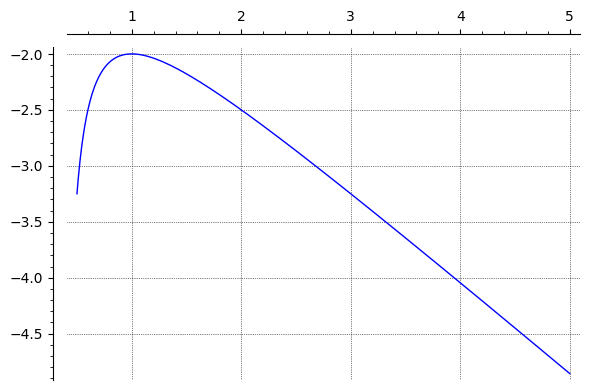

In [149]:
DEgval = 1
D2val  = 0
plot(cond1sub.subs(DEg=DEgval,D2=D2val)/(2*np.pi),(D1,0.5,5), gridlines=True)

In [150]:
plot(cond2sub.subs(DEg=DEgval,D2=D2val)/(2*np.pi),(D1,0.5,5), gridlines=True)

ValueError: Variable 'D1' not found

# Search for a solution of both conditions

In [17]:
#search for simultaneous roots
tol =1e-6
D1val= 2
DEgval = 1
valp=10
p = -1
minsol = 1
count = 0
while count<200:
    D1val = D1val - 10^p
    eq1s = cond2sub.subs(D1=D1val , DEg=DEgval) == - 380 *2*np.pi
    #eq1s = MMA_simplify(eq1s)
    sol = eq1s._mathematica_().NSolve("PositiveReals")[2][1][2]._sage_()
    #eq1s = eq1s.numerator()/eq1s.denominator()
    #eq = eq1s+2*np.pi == 0 #2*pi ??
    #sol = solve(eq,D2)
    #sol = sol[0].rhs().n()
    
    eq2s = cond1sub.subs(D1=D1val , DEg=DEgval, D=sol)/(2*np.pi)

    val = np.mod(float(abs(eq2s.n())) , 1)

    #val = abs(eq2s-2*np.pi)
    
    if val > 0.5:
        val = 1-val
    
    #print(f'precision: {p}')
    
    
    if abs(val)<tol:
        break
        
    if abs(val)<abs(valp):
        valp = val
        minsolD1 = D1val
        minsolD2 = sol
        print(D1val.n(), valp)
    
    count = count + 1
    
    
print('Finished')

print('\n\n')

print(valp ,minsolDEg.n() ,minsolD2)


99.9900000000000 0.3644643570027668
99.9800000000000 0.3599350668897934
99.9700000000000 0.3554056736030553
99.9600000000000 0.3508761774384901
99.9500000000000 0.3463465786917439
99.9400000000000 0.3418168776581645
99.9300000000000 0.33728707463284024
99.9200000000000 0.3327571699106322
99.9100000000000 0.3282271637861136
99.9000000000000 0.3236970565535806
99.8900000000000 0.31916684850705224
99.8800000000000 0.3146365399403237
99.8700000000000 0.310106131146906
99.8600000000000 0.3055756224200401
99.8500000000000 0.30104501405267214
99.8400000000000 0.29651430633757414
99.8300000000000 0.29198349956715575
99.8200000000000 0.2874525940336312
99.8100000000000 0.28292159002894124
99.8000000000000 0.27839048784473164
99.7900000000000 0.273859287772396
99.7800000000000 0.26932799010310404
99.7700000000000 0.26479659512773424
99.7600000000000 0.2602651031369092
99.7500000000000 0.25573351442099934
99.7400000000000 0.2512018292700837
99.7300000000000 0.24667004797402825
99.7200000000000 0.

NameError: name 'minsolDEg' is not defined

# Check how close to ideal the solutions are

In [18]:
cond1sub.subs(DEg=1,D1=minsolD1,D2=minsolD2)/(2*np.pi)

29.0018190162594

In [19]:
cond2sub.subs(DEg=1,D1=minsolD1,D2=minsolD2)/(2*np.pi)

-380.000000000000

In [20]:
print(minsolD1.n(),minsolD2)

99.1900000000000 0.973585966940121


# Test if gate works

In [21]:
# parameter substitution 
Cval = 10^8
phival = 0* np.pi 
R_fval = 1
gamma_fval = gamma
gamma_gval = gamma
DEgval = 1
Deg2val = DEgval*minsolD2  #*0.99999
Deg1val = DEgval*minsolD1   #*0.99999


In [22]:
eff_hval = eff_hamiltonian_tayl.subs(DEg=DEgval,C=Cval,phi=phival,R_f=R_fval,gamma_f=gamma_fval,gamma_g=gamma_gval,Deg2=Deg2val,Deg1= Deg1val)
eff_hval = (eff_hval + conjugate(eff_hval))

a_val = eff_hval[0,0]
b_val = eff_hval[1,1]
c_val = eff_hval[3,3]
d_val = eff_hval[4,4]
e_val = eff_hval[5,5]
f_val = eff_hval[7,7]

In [23]:
U = sg.copy(eff_hval)

tgval = np.pi /(a_val+e_val-b_val-d_val)

t1 = (a_val-b_val)*tgval
t2 = t1
t3 = (a_val-d_val)*tgval

R = [0 , t1, t2, t1+t2, t3, t1+t3, t2+t3, t1+t2+t3 ]

for i in range(8):
    U[i,i] = exp( (R[i] + (eff_hval[i,i]-a_val)*tgval )*I )
    
for i in range(8):
    U[i,i] = U[i,i]

In [24]:
show(symround(U,digits=5))

symround: Deleted coefficient -4.1555e-13
symround: Deleted coefficient -4.1555e-13


[                     1                      0                      0                      0                      0                      0                      0                      0]
[                     0                      1                      0                      0                      0                      0                      0                      0]
[                     0                      0                      1                      0                      0                      0                      0                      0]
[                     0                      0                      0   0.99994 + 0.011427*I                      0                      0                      0                      0]
[                     0                      0                      0                      0                      1                      0                      0                      0]
[                     0                      0                      0                      0                      0                     -1                      0                      0]
[                     0                      0                      0                      0                      0                      0                     -1                      0]
[                     0                      0                      0                      0                      0                      0                      0 1.0000 - 0.000059826*I]

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Check scalings of the above result

In [11]:
# functions to obtain scalings
def obtain_exponent(expr):
    expr = SR(str(( expr)).replace('Sqrt','sqrt'))
    try:
        exp = expr.op[0].op[0].op[0].op[1]
    except:
        try:
            exp = expr.op[0].op[0].op[1]
        except:
            try:
                exp = expr.op[0].op[1]
            except:
                exp = 0
    return exp

def obtain_expr_exp(expr):
    try:
        el = 0    
        q = (expr._mathematica_().Numerator()._sage_() .expand().operands()[el])
        q = SR(str(( q)).replace('Sqrt','sqrt'))
        test_bool = (str(q._mathematica_().Numerator()._sage_().expand().denominator()) == str(1))
        num_exp = (obtain_exponent(q._mathematica_().Numerator()._sage_().expand()))
        den1_exp = (obtain_exponent(q._mathematica_().Denominator()._sage_().expand()))
        den2_exp = (obtain_exponent(expr._mathematica_().Denominator()._sage_().expand()))
        res = num_exp-den1_exp-den2_exp
        if not test_bool:
            #show(q)
            res = obtain_exponent(q.numerator())-obtain_exponent(q.denominator())
            return res
        return res
    except:
        #print('altern')
        den_exp = obtain_exponent( expr._mathematica_().Denominator()._sage_().expand())
        num_exp = obtain_exponent( expr._mathematica_().Numerator()._sage_().expand())
        return num_exp-den_exp

# L elements

In [95]:
mx = -100   #maximum value of exponent

m = 1
m0 = 1   #exponent of detunings
m1 = 1
m2 = 1

phival = 0 * np.pi 
R_fval = 1
dctval = 1*C^m
gammaval = 1
kappa_cval = 1
kappa_bval = 1
gamma_fval = gammaval
gamma_gval = gammaval
DEgval = 1*C^m0
Deg2val = 1*C^m1 #minsolD2  #*0.99999
Deg1val = 1*C^m2 #minsolD1

for lindop in range(13):
    show(lindop,eff_lind_coeff[lindop]  )
    pos = 0
    more = True
    while(more):
        try: 
            err = eff_lind[lindop][pos].subs(dct=dctval ,kappa_c=kappa_cval,kappa_b=kappa_bval,Omega=1, R_f=R_fval,Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,gamma_g=gamma_gval,gamma=gammaval,gamma_f=gamma_fval, phi=phival)
            err = err*conjugate(err)
            err = err._mathematica_().Together()._sage_() 

            err = symround(err,digits=14,show_del=False)
            exp = obtain_expr_exp(err)
            if exp > mx:
                mx = exp
            pos += 1
            print((exp.n(digits=3)))

        except IndexError:
            more = False
print(f'Max is {mx.n(digits=3)}')

0 sqrt(kappa_c)

-3.00
-3.00
-3.00
-3.00
-3.00
-3.00
-3.00
-3.00


1 sqrt(gamma)

-4.00
-4.00
-4.00
-4.00


2 sqrt(kappa_b)

-2.00
-2.00
-2.00
-2.00
-2.00
-2.00
-2.00
-2.00


3 sqrt(kappa_c)

-3.00
-3.00
-3.00
-3.00
-3.00
-3.00
-3.00
-3.00


4 sqrt(gamma)

-4.00
-4.00
-4.00
-4.00


5 sqrt(kappa_b)

-2.00
-2.00
-2.00
-2.00
-2.00
-2.00
-2.00
-2.00


6 sqrt(kappa_c)

-3.00
-3.00
-3.00
-3.00
-3.00
-3.00
-3.00
-3.00


7 sqrt(gamma_g)

-10.0
-12.0
-12.0
-14.0
-12.0
-14.0
-14.0
-43.0


8 sqrt(gamma_f)

-10.0
-12.0
-12.0
-14.0
-12.0
-14.0
-14.0
-43.0


9 sqrt(kappa_b)

-2.00
-2.00
-2.00
-2.00
-2.00
-2.00
-2.00
-2.00


10 sqrt(kappa_c)

-3.00
-3.00
-3.00
-3.00
-3.00
-3.00
-3.00
-3.00


11 sqrt(gamma)

-4.00
-4.00
-4.00
-4.00


12 sqrt(kappa_b)

-2.00
-2.00
-2.00
-2.00
-2.00
-2.00
-2.00
-2.00
Max is -2.00


In [96]:
terms = [a,b,d,e]
mx = -9999
for term in terms:
    err = term.subs(dct=dctval ,kappa_c=kappa_cval,kappa_b=kappa_bval,Omega=1, R_f=R_fval,Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,gamma_g=gamma_gval,gamma=gammaval,gamma_f=gamma_fval, phi=phival)

    err = err._mathematica_().Together()._sage_() 

    err = symround(err,digits=14,show_del=False)
    exp = obtain_expr_exp(err)
    if exp > mx:
        mx = exp
    pos += 1
    print((exp.n(digits=3)))
print(f'Max is {mx.n(digits=3)}  so tg ~ C^{-mx.n(digits=3)}')

-1.00
-1.00
-1.00
-1.00
Max is -1.00  so tg ~ C^1.00


# $H_{eff}$ elements

In [359]:
a = eff_hamiltonian_tayl[0,0]
#a = symround( MMA_simplify(a,full=False) ,digits = 14)
b = eff_hamiltonian_tayl[1,1]
#b = symround(MMA_simplify(b,full=False),digits = 14)
c = eff_hamiltonian_tayl[3,3]
#c = symround(MMA_simplify(c,full=False),digits = 14)
d = eff_hamiltonian_tayl[4,4]
#d = symround(MMA_simplify(d,full=False),digits = 14)
e = eff_hamiltonian_tayl[5,5]
#e = symround(MMA_simplify(e,full=False),digits = 14)
f = eff_hamiltonian_tayl[7,7]
#f = symround(MMA_simplify(f,full=False),digits = 14)
a = (a + conjugate(a)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
b = (b + conjugate(b)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
c = (c + conjugate(c)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
d = (d + conjugate(d)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
e = (e + conjugate(e)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
f = (f + conjugate(f)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()

In [21]:
x = symround(e.subs(kappa_c=kappa_cval,kappa_b=kappa_bval,Omega=1, R_f=R_fval,Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,gamma_g=gamma_gval,gamma=gammaval,gamma_f=gamma_fval, phi=phival))
x = x._mathematica_().Together().sage()
print('Numerator')
show(symround(x._mathematica_().Numerator()._sage_().expand(),digits=5))
print('\n\nDenominator')
show(symround(x._mathematica_().Denominator()._sage_().expand(),digits=5))

Numerator


100



Denominator


C

# ---------------------------------------------

#  Try $D2 =0$

In [68]:
a = eff_hamiltonian_tayl[0,0]
#a = symround( MMA_simplify(a,full=False) ,digits = 14)
b = eff_hamiltonian_tayl[1,1]
#b = symround(MMA_simplify(b,full=False),digits = 14)
c = eff_hamiltonian_tayl[3,3]
#c = symround(MMA_simplify(c,full=False),digits = 14)
d = eff_hamiltonian_tayl[4,4]
#d = symround(MMA_simplify(d,full=False),digits = 14)
e = eff_hamiltonian_tayl[5,5]
#e = symround(MMA_simplify(e,full=False),digits = 14)
f = eff_hamiltonian_tayl[7,7]
#f = symround(MMA_simplify(f,full=False),digits = 14)


#SUBSTITUTIONS
phival = phi
R_fval = 1
gamma_fval = gamma
gamma_gval = gamma
Deg2val = 0


#modify abcdef
a = (a + conjugate(a)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
b = (b + conjugate(b)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
c = (c + conjugate(c)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
d = (d + conjugate(d)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
e = (e + conjugate(e)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
f = (f + conjugate(f)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()

term_list = [a,b,c,d,e,f]
index_list =[0,1,2,3,4,5]
high_c_limit = [  ]

#If we get error/division 0 modify this:
err_term = 0

for (i,term) in enumerate(term_list):
    if i ==5 and err_term!=0:
        err_term -= 1
    num = term._mathematica_().Numerator().Collect('C')._sage_().operands()[err_term]
    
    try:
        den = term._mathematica_().Denominator().Collect('C')._sage_().operands()[0]
    except:
        den= term._mathematica_().Denominator()._sage_().expand()._mathematica_().Collect('C')._sage_().operands()[0]
    tayl = num/den
    tayl = MMA_simplify(tayl,full=True)
    high_c_limit.append(tayl)
    
a = high_c_limit[0]
b = high_c_limit[1]
c = high_c_limit[2]
d = high_c_limit[3]
e = high_c_limit[4]
f = high_c_limit[5]

show(a,b,c,d,e,symround(f))

symround: Deleted coefficient -8.5e-14


1.00000000000000*Omega^2/(C*DEg*gamma) 1.00000000000000*Omega^2/(C*DEg*gamma) 1.00000000000000*Omega^2/(C*DEg*gamma) 1.00000000000000*Omega^2/(C*DEg*gamma) 1.00000000000000*Omega^2/(C*DEg*gamma) Omega^2*(-0.15*I*e^(56*I*phi) + 3.4*I*e^(52*I*phi) - 7.9*I*e^(48*I*phi) - 150*I*e^(44*I*phi) + 150*I*e^(36*I*phi) + 7.9*I*e^(32*I*phi) - 3.4*I*e^(28*I*phi) + 0.15*I*e^(24*I*phi))/(C^2*DEg^2*gamma*(e^(56*I*phi) - 18.*e^(52*I*phi) - 64*e^(48*I*phi) + 1232*e^(44*I*phi) + 5184*e^(40*I*phi) + 1232*e^(36*I*phi) - 64*e^(32*I*phi) - 18.*e^(28*I*phi) + e^(24*I*phi)))

In [62]:
show(symround(MMA_simplify(f,full=True)))

symround: Deleted coefficient -8.5e-14


Omega^2*(-0.15*I*e^(56*I*phi) + 3.4*I*e^(52*I*phi) - 7.9*I*e^(48*I*phi) - 150*I*e^(44*I*phi) + 150*I*e^(36*I*phi) + 7.9*I*e^(32*I*phi) - 3.4*I*e^(28*I*phi) + 0.15*I*e^(24*I*phi))/(C^2*DEg^2*gamma*(e^(56*I*phi) - 18.*e^(52*I*phi) - 64*e^(48*I*phi) + 1232*e^(44*I*phi) + 5184*e^(40*I*phi) + 1232*e^(36*I*phi) - 64*e^(32*I*phi) - 18.*e^(28*I*phi) + e^(24*I*phi)))

In [50]:
#tg_calculation
t_den = (a + e - b - d)._mathematica_().Together()._sage_()

ttden = symround(t_den, show_del=True,digits=16  )
numnum = 0
dennum = 0

tg = np.pi / ttden
show(symround(MMA_simplify(tg,full=True).subs()))

symround: Deleted coefficient 4.005934284325451e-32


-26*C^3*DEg^2*Deg1^2*gamma/((DEg - 0.032*Deg1)*Omega^2)

In [51]:
#cond1
t_den = (a + c - 2*b )._mathematica_().Together()._sage_()

ttden = symround(t_den, show_del=True,digits=14  )

print('Finished!')

cond1 = tg*ttden
show(symround(MMA_simplify(cond1,full= not True).subs(),digits =5))

symround: Deleted coefficient 2.2204460492503e-16
Finished!


-3.6483*DEg*Deg1^2/(DEg - 0.032258*Deg1)

In [53]:
# cond2
t_den = (2*a - 2*b -d + f )._mathematica_().Together()._sage_()
ttden = symround(t_den, show_del=True,digits=14 )

taylnf = ttden
show(symround(taylnf,show_del=False))

cond2 = taylnf*tg
cond2 = MMA_simplify(cond2,full=not True)
show(symround(MMA_simplify(cond2,full= not True).subs(),digits =5))

symround: Deleted coefficient 1.1481063742006e-17


-Omega^2/(C*DEg*gamma)

25.943*C^2*DEg*Deg1^2/(DEg - 0.032258*Deg1)

In [54]:
cond1 = MMA_simplify(cond1,full=True)
show(symround(cond1))
print('\n\n\n')
cond2 = MMA_simplify(cond2,full=True)
show(symround(cond2))

-3.7*DEg*Deg1^2/(DEg - 0.032*Deg1)

26*C^2*DEg*Deg1^2/(DEg - 0.032*Deg1)

In [55]:
var('D1', domain='positive',latex_name='D_1')
var('D2', domain='positive',latex_name='D_2')
cond1sub = cond1.subs(Deg1 = DEg *D1 , Deg2 = DEg *D2 )
cond1sub = MMA_simplify(cond1sub,full=True)
cond2sub = cond2.subs(Deg1 = DEg *D1 , Deg2 = DEg *D2 )
cond2sub = MMA_simplify(cond2sub,full=True)

In [56]:
show(symround(cond1sub._mathematica_().Together().Collect('D_1')._sage_()))

show(symround(cond2sub))

113*D1^2*DEg^2/(D1 - 31)

-808*C^2*D1^2*DEg^2/(D1 - 31)

In [58]:
var('k',domain='integer')
eq = cond1sub == 2*k*np.pi

solDEg = solve(eq,DEg)[0]
show(solDEg)
solDEg = solDEg.rhs().simplify_full()

cond2simp = MMA_simplify( cond2sub.subs(DEg=solDEg) )

#show(cond2simp == 2*var('n')*pi)

#manual change:
cond2simp = cond2simp.numerator()/(D1-31)

show(cond2simp == 2*var('n')*pi)

eq = cond2simp.subs(k=1) /(2*np.pi) == -70000

solC = solve(eq,C)[0].rhs().n(digits=14)




Cval=1000

'''
mn = 10
mnk = 0
for kk in range(100,1000):
    #val = (cond2simp/(2*np.pi)).subs(C=Cval,k=-kk).n(digits=14)
    val = np.mod((abs(cond2simp.subs(C=Cval,k=-kk).n(digits=14))) , 2*np.pi)    
    #print(val,kk,cond2simp.subs(C=Cval,k=-kk).n(digits=14))
    if val > 0.5:
        val = 1-val
    if val<mn:
        mn = val
        mnk=-kk
        print(val,kk,cond2simp.subs(C=Cval,k=-kk).n(digits=14))
        '''

DEg == 9*sqrt(1629300866482/2375520663330751*D1*k - 1629300866482/76629698817121*k)/D1

-44.6804288510549*C^2*k == 2*pi*n

'\nmn = 10\nmnk = 0\nfor kk in range(100,1000):\n    #val = (cond2simp/(2*np.pi)).subs(C=Cval,k=-kk).n(digits=14)\n    val = np.mod((abs(cond2simp.subs(C=Cval,k=-kk).n(digits=14))) , 2*np.pi)    \n    #print(val,kk,cond2simp.subs(C=Cval,k=-kk).n(digits=14))\n    if val > 0.5:\n        val = 1-val\n    if val<mn:\n        mn = val\n        mnk=-kk\n        print(val,kk,cond2simp.subs(C=Cval,k=-kk).n(digits=14))\n        '

In [17]:
#manual
mn = 10
mnk = 0
for kk in range(1,1000):
    val = 44.6804288510549 * 100^2 * kk / (2*np.pi)
    val = np.mod(val , 1) 

    if val > 0.5:
        val = 1-val
    if val<mn:
        mn = val
        mnk=-kk
        print(val,kk)     


0.11111111121135764 1
0.1111111103091389 8
9.313225746154785e-10 9


In [29]:
mnk = -1
Cval = sqrt( 2*np.pi/44.6804288510549 * 10^6 )

In [30]:
show(C==Cval)
show(k==mnk)

C == 375.000000000000

k == -1

In [31]:
minsolD1 = 5
minsolDEg = solDEg.subs(k=mnk,D1=minsolD1).n()
show(D1 == minsolD1)
show(DEg == minsolDEg)

D1 == 5

DEg == 0.240370085030933

In [45]:
#DEgval <= 0.5 , >=1.8
DEgval = 10
D2val  = 0
plot(cond1sub.subs(DEg=DEgval,D2=D2val)/(2*np.pi),(D1,0.1,10),  scale='semilogx', gridlines=True)

ValueError: Variable 'D1' not found

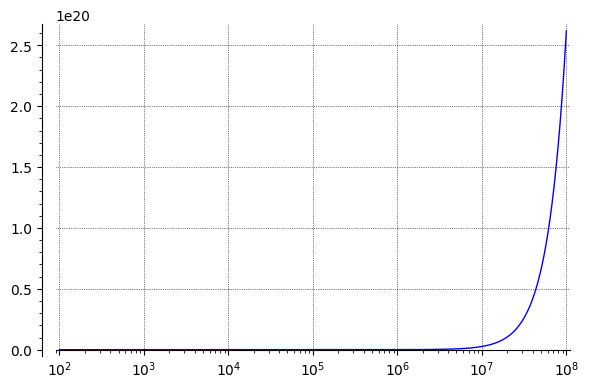

In [46]:
plot(cond2sub.subs(DEg=DEgval,D1=7)/(2*np.pi),(C,1e2,1e8),  scale='semilogx',gridlines=True)

In [23]:
cond1sub.subs(DEg=minsolDEg,D1=minsolD1)/(2*np.pi)

-1.00000000000000

In [24]:
cond2sub.subs(DEg=minsolDEg,D1=minsolD1,C=Cval)/(2*np.pi)

100000.000000000

In [73]:
# parameter substitution 

phival = 1/4 * np.pi 
R_fval = 1
gamma_fval = gamma
gamma_gval = gamma
DEgval = minsolDEg#*0.999
Deg2val = 0  
Deg1val = minsolDEg*minsolD1   #*0.99999

In [74]:
eff_hval = eff_hamiltonian_tayl.subs(DEg=DEgval,C=Cval,phi=phival,R_f=R_fval,gamma_f=gamma_fval,gamma_g=gamma_gval,Deg2=Deg2val,Deg1= Deg1val)
eff_hval = (eff_hval + conjugate(eff_hval))

a_val = eff_hval[0,0]
b_val = eff_hval[1,1]
c_val = eff_hval[3,3]
d_val = eff_hval[4,4]
e_val = eff_hval[5,5]
f_val = eff_hval[7,7]

In [75]:
U = sg.copy(eff_hval)

tgval = np.pi /(a_val+e_val-b_val-d_val)

t1 = (a_val-b_val)*tgval
t2 = t1
t3 = (a_val-d_val)*tgval

R = 0*[0 , t1, t2, t1+t2, t3, t1+t3, t2+t3, t1+t2+t3 ]

for i in range(8):
    try:
        U[i,i] = np.exp( (R[i] + (eff_hval[i,i]-a_val)*tgval ) *I )
        print((R[i] + (eff_hval[i,i]-a_val)*tgval))
    except:
        print(i)


for i in range(8):
    U[i,i] = U[i,i]

0
1
2
3
4
5
6
7


In [76]:
show(symround(U,digits=5))

symround: Deleted coefficient 1.9858e-22


[0.0041601*Omega^2/gamma                       0                       0                       0                       0                       0                       0                       0]
[                      0 0.0041601*Omega^2/gamma                       0                       0                       0                       0                       0                       0]
[                      0                       0 0.0041601*Omega^2/gamma                       0                       0                       0                       0                       0]
[                      0                       0                       0 0.0041601*Omega^2/gamma                       0                       0                       0                       0]
[                      0                       0                       0                       0 0.0041601*Omega^2/gamma                       0                       0                       0]
[                      0                       0                       0                       0                       0 0.0041601*Omega^2/gamma                       0                       0]
[                      0                       0                       0                       0                       0                       0 0.0041601*Omega^2/gamma                       0]
[                      0                       0                       0                       0                       0                       0                       0                       0]

In [226]:
mx = -100   #maximum value of exponent
m = 1       #exponent of detunings

phival = 1/4* np.pi 
R_fval = 1
gammaval = 0.01
kappa_cval = 1
kappa_bval = 0.9
gamma_fval = gammaval
gamma_gval = gammaval
DEgval = minsolDEg#*0.999
Deg2val = 0 
Deg1val = minsolDEg*minsolD1   #*0.99999

for lindop in range(13):
    show(lindop,eff_lind_coeff[lindop]  )
    pos = 0
    more = True
    while(more):
        try: 
            err = eff_lind[lindop][pos].subs(kappa_c=kappa_cval,kappa_b=kappa_bval,Omega=1, R_f=R_fval,Deg1=Deg1val*C^m,Deg2=Deg2val*C^m,DEg=DEgval*C^m,gamma_g=gamma_gval,gamma=gammaval,gamma_f=gamma_fval, phi=phival)
            err = err._mathematica_().Together()._sage_() 
            exp = obtain_expr_exp(err)
            if exp > mx:
                mx = exp
            pos += 1
            print(exp)
        except IndexError:
            more = False

NameError: name 'minsolDEg' is not defined

In [59]:
a = eff_hamiltonian_tayl[0,0]
#a = symround( MMA_simplify(a,full=False) ,digits = 14)
b = eff_hamiltonian_tayl[1,1]
#b = symround(MMA_simplify(b,full=False),digits = 14)
c = eff_hamiltonian_tayl[3,3]
#c = symround(MMA_simplify(c,full=False),digits = 14)
d = eff_hamiltonian_tayl[4,4]
#d = symround(MMA_simplify(d,full=False),digits = 14)
e = eff_hamiltonian_tayl[5,5]
#e = symround(MMA_simplify(e,full=False),digits = 14)
f = eff_hamiltonian_tayl[7,7]
#f = symround(MMA_simplify(f,full=False),digits = 14)

In [58]:
show(symround((MMA_simplify(symround(a),full=True))))

symround: Deleted coefficient 3.3e-16
symround: Deleted coefficient -4.2e-18
symround: Deleted coefficient 5.3e-16
symround: Deleted coefficient -3.5e-16
symround: Deleted coefficient 2.7e-17
symround: Deleted coefficient 1.1e-19
symround: Deleted coefficient -1.0e-16
symround: Deleted coefficient 1.7e-16
symround: Deleted coefficient 7.5e-17
symround: Deleted coefficient -3.1e-18
symround: Deleted coefficient 1.9e-18
symround: Deleted coefficient 1.3e-16
symround: Deleted coefficient 6.2e-33
symround: Deleted coefficient 2.4e-17
symround: Deleted coefficient 1.9e-34
symround: Deleted coefficient 1.9e-34
symround: Deleted coefficient 1.1e-19
symround: Deleted coefficient 8.3e-18
symround: Deleted coefficient 2.1e-17
symround: Deleted coefficient 4.4e-17
symround: Deleted coefficient -7.7e-34
symround: Deleted coefficient -7.8e-19
symround: Deleted coefficient 1.4e-18
symround: Deleted coefficient -1.8e-35
symround: Deleted coefficient 2.2e-17
symround: Deleted coefficient 7.2e-18
symro

((-0.00098*dct^6 + (C*(-0.070*C - 0.012) - 0.00073)*dct^4 + (((C*(-1.1*C - 0.44) - 0.074)*C - 0.0059)*C - 0.00018)*dct^2 - (((((4*C + 2.5)*C + 0.78)*C + 0.14)*C + 0.014)*C + 0.00073)*C - 0.000015)*C*dct + (0.00098*dct^8 + (C*(0.094*C + 0.016) + 0.00098)*dct^6 + ((((2.2*C + 0.88)*C + 0.15)*C + 0.012)*C + 0.00037)*dct^4 + (((((2*(8*C + 5)*C + 3.1)*C + 0.56)*C + 0.057)*C + 0.0029)*C + 0.000061)*dct^2 + (((((4*C + 2.5)*C + 0.64)*C + 0.086)*C + 0.0063)*C + 0.00024)*C + 3.8e-6)*DEg)*Omega^2/((((4*DEg + 5.2*I)*dct + 2*I*DEg - 2.6)*C^3 - C^4 - (((2.5*I*DEg - 2.9)*dct - 2.5*DEg - 2.9*I)*dct - 0.62*I*DEg + 0.72)*C^2 - ((((0.50*DEg + 0.53*I)*dct + 0.75*I*DEg - 0.80)*dct - 0.38*DEg - 0.40*I)*dct - 0.062*I*DEg + 0.066)*C - ((((-0.031*I*DEg + 0.031)*dct + 0.062*DEg + 0.062*I)*dct + 0.047*I*DEg - 0.047)*dct - 0.016*DEg - 0.016*I)*dct + 0.0020*I*DEg - 0.0020)*(((4*DEg - 5.2*I)*dct - 2*I*DEg - 2.6)*C^3 - C^4 - (((-2.5*I*DEg - 2.9)*dct - 2.5*DEg + 2.9*I)*dct + 0.62*I*DEg + 0.72)*C^2 - ((((0.50*DEg - 0.53*I)*dct - 0.75*I*DEg - 0.80)*dct - 0.38*DEg + 0.40*I)*dct + 0.062*I*DEg + 0.066)*C - ((((0.031*I*DEg + 0.031)*dct + 0.062*DEg - 0.062*I)*dct - 0.047*I*DEg - 0.047)*dct - 0.016*DEg + 0.016*I)*dct - 0.0020*I*DEg - 0.0020)*gamma)

In [64]:
show(symround(a))

Omega^2/(DEg*gamma)

In [68]:
show(symround(f))

((Deg2^4 + 0.81*Deg2^2 + 0.14)^2*((Deg2^2 + 2.8)*Deg1^2 + 2.4*Deg2^2 + 2)*DEg^5 + ((Deg2^2 + 0.56)^2*(Deg2^2 + 0.25)^3*Deg1 + 2*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*Deg1^2*Deg2 + 1.1*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*Deg2)*DEg^6 + 2*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*((Deg2^2 + 2.8)*Deg1^2 + 2.4*Deg2^2 + 2.0)*DEg^3 - 1.6*(Deg2^2 + 0.56)^2*(Deg2^2 + 0.25)^3*Deg1 + (0.44*(Deg2^2 + 0.56)^2*(Deg2^2 + 0.25)^3*Deg1 + 0.88*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*Deg1^2*Deg2 + 0.49*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*Deg2)*DEg^4 - 3.1*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*Deg1^2*Deg2 + (Deg2^4 + 0.81*Deg2^2 + 0.14)^2*((Deg2^2 + 2.8)*Deg1^2 + 2.4*Deg2^2 + 2)*DEg + (-2.1*(Deg2^2 + 0.56)^2*(Deg2^2 + 0.25)^3*Deg1 - 4.2*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*Deg1^2*Deg2 - 2.4*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*Deg2)*DEg^2 - 1.8*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*Deg2)*Omega^2/((6.2*Deg2^8 + (Deg2^8 + 5.4*Deg2^6 + 6.1*Deg2^4 + (4*Deg2^6 + 5.5*Deg2^4 + 2.4*Deg2^2 + 0.32)*Deg1^2 + (4*Deg2^6 + 5.5*Deg2^4 + 2.4*Deg2^2 + 0.32)*Deg1*Deg2 + 2.5*Deg2^2 + 0.32)*DEg^6 + (2.2*Deg2^7 + 3.1*Deg2^5 + (4*Deg2^6 + 5.5*Deg2^4 + 2.4*Deg2^2 + 0.32)*Deg1^2*Deg2 + 2*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*Deg1 + 1.3*Deg2^3 + 0.18*Deg2)*DEg^5 + 22.*Deg2^6 + (6.6*Deg2^8 + 28.*Deg2^6 + 30.*Deg2^4 + (Deg2^8 + 20.*Deg2^6 + 27*Deg2^4 + 12.*Deg2^2 + 1.5)*Deg1^2 + (16.*Deg2^6 + 23.*Deg2^4 + 9.9*Deg2^2 + 1.3)*Deg1*Deg2 + 12.*Deg2^2 + 1.5)*DEg^4 + (5.8*Deg2^6 + (5.1*Deg2^4 + 5.8*Deg2^2 + 1.6)*Deg1*Deg2^3 + 7.9*Deg2^4 + (10.*Deg2^6 + 14.*Deg2^4 + 6.1*Deg2^2 + 0.81)*Deg1^2 + 3.4*Deg2^2 + 0.46)*DEg^3*Deg2 + 22.*Deg2^4 + (12.*Deg2^8 + 44.*Deg2^6 + 45*Deg2^4 + (2.6*Deg2^8 + 33*Deg2^6 + 42*Deg2^4 + 18.*Deg2^2 + 2.3)*Deg1^2 + (22.*Deg2^6 + 30.*Deg2^4 + 13.*Deg2^2 + 1.8)*Deg1*Deg2 + 17.*Deg2^2 + 2.2)*DEg^2 + (1.6*Deg2^8 + 16.*Deg2^6 + 20.*Deg2^4 + 8.5*Deg2^2 + 1.1)*Deg1^2 + (9.8*Deg2^6 + 13.*Deg2^4 + 5.8*Deg2^2 + 0.77)*Deg1*Deg2 + (3.5*Deg2^7 + 4.8*Deg2^5 + (6.2*Deg2^6 + 8.6*Deg2^4 + 3.8*Deg2^2 + 0.50)*Deg1^2*Deg2 + 3.1*(Deg2^4 + 0.81*Deg2^2 + 0.14)^2*Deg1 + 2.1*Deg2^3 + 0.28*Deg2)*DEg + 8.2*Deg2^2 + 1.0)*(DEg + I)*(DEg - I)*(Deg2 + 0.50*I)*(Deg2 - 0.50*I)*gamma)